In [89]:
# @title installation of ultralytics
!pip install ultralytics -q

In [90]:
# @title Importing necessary libraries
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [14]:
# @title Creating YOLO model
model = YOLO("yolov8x-seg.pt")


100%|██████████| 137M/137M [00:00<00:00, 247MB/s]


In [36]:
# @title Making Predict
img_path = '/content/imgB1.jpg' # @param {type:"string"}
predict = model.predict(img_path , save = True , save_txt = True)



image 1/1 /content/imgB1.jpg: 288x640 1 mouse, 2325.6ms
Speed: 3.2ms preprocess, 2325.6ms inference, 3.7ms postprocess per image at shape (1, 3, 288, 640)
Results saved to runs/segment/predict4
2 labels saved to runs/segment/predict4/labels


In [79]:
predict[0]
predict[0].masks
predict[0].masks.data.shape
predict[0].masks.data[0].unique()

tensor([0., 1.])

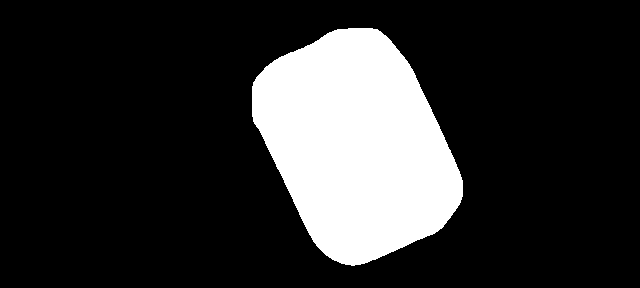

In [59]:
cv2_imshow(predict[0].masks.data[0].numpy() * 256)


image 1/1 /content/OIP.jpg: 480x640 1 dog, 5144.0ms
Speed: 3.0ms preprocess, 5144.0ms inference, 4.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict19
1 label saved to runs/segment/predict19/labels
(342, 474, 3) (342, 474, 3)


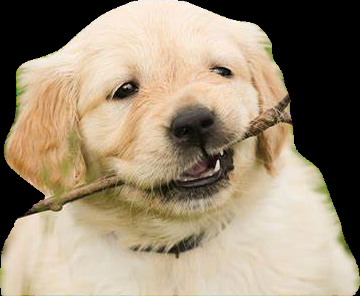

In [95]:
# @title Complete code for object segmentation
# Importing necessary libraries
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Creating YOLO model
model = YOLO("yolov8x-seg.pt")

# Making Prediction
img_path = '/content/OIP.jpg'  # Replace with the path to your image
predict = model.predict(img_path, save=True, save_txt=True)
# Extracting segmentation mask
for i in range(len(predict)):
  segmentation_mask = predict[i].masks.data[i].numpy() * 255  # Ensure the correct scale
  segmentation_mask = segmentation_mask.astype('uint8')  # Ensure the correct data type

  # Applying the segmentation mask to the original image
  original_image = cv2.imread(img_path)
  segmentation_mask = cv2.cvtColor(segmentation_mask, cv2.COLOR_GRAY2BGR)  # Convert mask to 3 channels
  segmentation_mask_resized = cv2.resize(segmentation_mask, (original_image.shape[1], original_image.shape[0]))

  print(original_image.shape, segmentation_mask_resized.shape)

  segmented_object = cv2.bitwise_and(original_image, segmentation_mask_resized)

  # Displaying the result
  #cv2_imshow(segmented_object)

  segmented_object_resized = cv2.resize(segmented_object, (original_image.shape[1], original_image.shape[0]))
  #cv2_imshow(segmented_object_resized)
  #segmented_object_resized.shape

  # Find contours in the segmentation mask to identify the boundaries of the segmented object
  contours, _ = cv2.findContours(segmentation_mask_resized[:, :, 0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Ensure at least one contour is found
  if contours:
      # Find the bounding box of the largest contour
      largest_contour = max(contours, key=cv2.contourArea)
      x, y, w, h = cv2.boundingRect(largest_contour)

      # Crop the segmented object using the bounding box
      segmented_object_cropped = segmented_object[y:y + h, x:x + w]

      # Display the cropped segmented object
      cv2_imshow(segmented_object_cropped)
  else:
      print("No contours found.")